In [2]:
import numpy as np
import math
from scipy.optimize import linprog, minimize, differential_evolution,LinearConstraint, NonlinearConstraint
import matplotlib.pyplot as plt

# Example with Minimize function

## Example 1

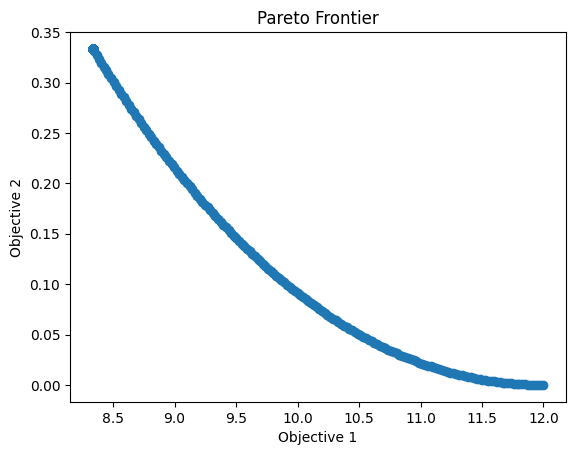

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the two objective functions
def obj1(xyz):
    x, y, z = xyz
    return x**2 + y**2 + z**2

def obj2(xyz):
    x, y, z = xyz
    return (2 - x)**2 + (2 - y)**2 + (2 - z)**2

# Define the linear constraint: x + y + z >= 5
def linear_constraint(xyz):
    x, y , z = xyz
    return x + y + z - 5

# Define the non-linear constraint: x^2 + y^2 + z >= 4
def nonlinear_constraint(xyz):
    x, y , z = xyz
    return x**2  + y**2 + z - 4


# Define the constraints
constraints = [
    {"type": "ineq", "fun": linear_constraint},
    {"type": "ineq", "fun": nonlinear_constraint},
]

# Minimize the two functions for different weights
num_points = 1000
z1 = []
z2 = []
weights = np.linspace(0, 1, num_points)

for w in weights:
    # Define the weighted sum of objectives
    def weighted_sum(xyz):
        return w * obj1(xyz) + (1 - w) * obj2(xyz)

    # Optimize the weighted sum
    initial_guess = np.zeros(3)
    result = minimize(weighted_sum, x0=initial_guess , constraints=constraints)
    xyz_opt = result.x
    z1.append(obj1(xyz_opt))
    z2.append(obj2(xyz_opt))

# Plot the Pareto Frontier
plt.plot(z1, z2, marker='o', linestyle='-')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Pareto Frontier')
plt.show()


## Example 2

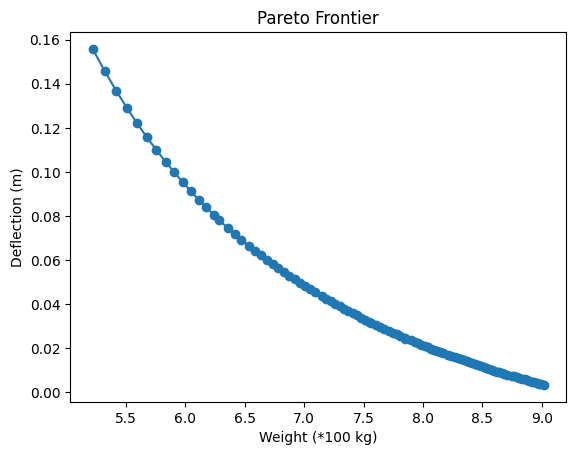

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Beam and material properties
L = 5  # Beam length (m)
w = 2000  # Uniform load (N/m)
E = 2e9  # Elastic modulus (Pa)
material_density = 7850  # Material density (kg/m^3)
allowable_stress = 2e7  # Allowable stress (Pa)

# Define the two objective functions
def f1(hb):
    h, b = hb
    return h * b * material_density * L

def f2(hb):
    h, b = hb
    return (5 * w * L**4) / (384 * E * h * b**3)

# Define the stress constraint
def stress_constraint(hb):
    h, b = hb
    M = w * L**2 / 8  # Maximum bending moment
    y = h / 2  # Distance from neutral axis to extreme fiber
    I = b * h**3 / 12  # Moment of inertia
    bending_stress = (M * y) / I
    return bending_stress

# Define the constraints

constraint1 = NonlinearConstraint(stress_constraint, 0, allowable_stress)

constraints = [constraint1]
# Bounds for height and width of the beam
bounds = [(0.01, 1), (0.01, 1)]

# Minimize the two functions for different weights
num_points = 100
pareto_front = []
weights = np.linspace(0.1, 0.9, num_points)

for w in weights:
    # Define the weighted sum of objectives
    def weighted_sum(hb):
        return w * f1(hb) / 100 + (1 - w) * f2(hb)   # divide f1 by 100 to make both function in the same order of magnitude to achieve a better plot

    # Optimize the weighted sum
    result = minimize(weighted_sum, x0 = np.array([0.1,0.1]), bounds=bounds, constraints=constraints)
    hb_opt = result.x
    pareto_front.append((f1(hb_opt), f2(hb_opt)))

# Extract the x and y values of the Pareto Frontier points
pareto_x, pareto_y = zip(*pareto_front)

# Plot the Pareto Frontier
plt.plot(pareto_x, pareto_y, marker='o', linestyle='-')
plt.xlabel('Weight (*100 kg)')
plt.ylabel('Deflection (m)')
plt.title('Pareto Frontier')
plt.show()


# Example with Differential-Evolution function

## Example 3

/usr/local/lib/python3.9/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


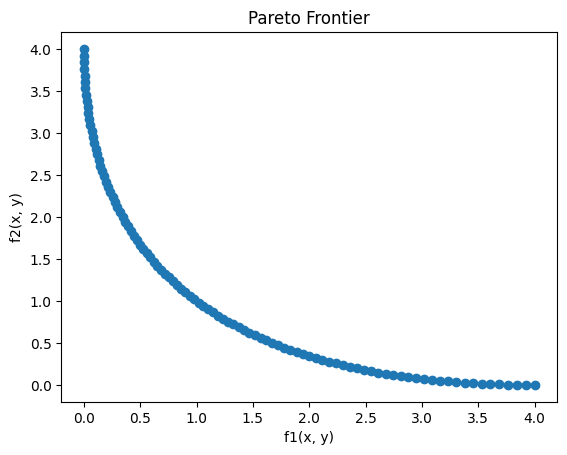

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Define the two objective functions
def f1(decision_variables):
    x, y = decision_variables
    return x**2 + y**2

def f2(decision_variables):
    x, y = decision_variables
    return (x - 2)**2 + y**2

# Define the linear constraint:  x + y <= 2
constraint1 = LinearConstraint([1,1], -np.inf, 2)


# Define the non-linear constraint: x^2 + y^2 <= 4
def constraint2(decision_variables):
    x, y = decision_variables
    return x**2 + y**2

constraint2 = NonlinearConstraint(constraint2, 0, 4)

# Define the constraints
constraints = [constraint1 , constraint2 ]

# Bounds for decision variables x and y
bounds = [(-10, 10), (-10, 10)]

# Minimize the two functions for different weights
num_points = 100
pareto_front = []
weights = np.linspace(0, 1, num_points)

for w in weights:
    # Define the weighted sum of objectives
    def weighted_sum(decision_variables):
        return w * f1(decision_variables) + (1 - w) * f2(decision_variables)

    # Optimize the weighted sum
    result = differential_evolution(weighted_sum, bounds=bounds, constraints=constraints)
    xy_opt = result.x
    pareto_front.append((f1(xy_opt), f2(xy_opt)))

# Extract the x and y values of the Pareto Frontier points
pareto_x, pareto_y = zip(*pareto_front)

# Plot the Pareto Frontier
plt.plot(pareto_x, pareto_y, marker='o', linestyle='-')
plt.xlabel('f1(x, y)')
plt.ylabel('f2(x, y)')
plt.title('Pareto Frontier')
plt.show()


## Example 4

In this example, we will optimize the design of a rainwater harvesting system for a building. Our objectives are to minimize the total cost and maximize the amount of harvested rainwater. The two decision variables are the surface area of the catchment (A) and the storage tank volume (V).

Objective functions:

f1(A, V) = total_cost = A * cost_per_m2 + V * cost_per_m3

f2(A, V) = harvested_rainwater = A * annual_rainfall * runoff_coefficient - tank_overflow


Constraints:

Minimum catchment area constraint: A >= min_catchment_area

Maximum catchment area constraint: A <= max_catchment_area

Minimum storage volume constraint: V >= min_storage_volume

Maximum storage volume constraint: V <= max_storage_volume

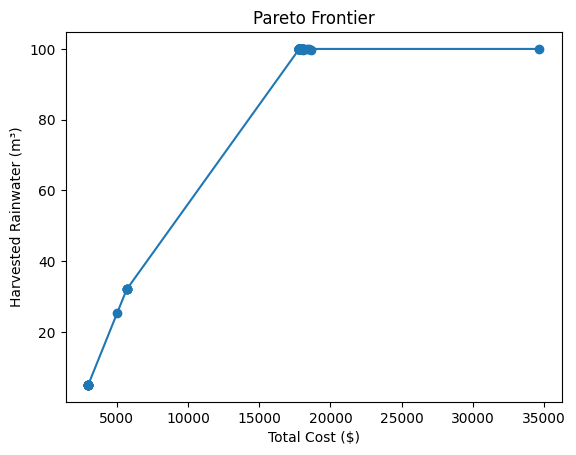

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Parameters for the rainwater harvesting system
cost_per_m2 = 50  # Cost per square meter of catchment area ($/m^2)
cost_per_m3 = 100  # Cost per cubic meter of storage tank volume ($/m^3)
annual_rainfall = 800  # Annual rainfall (mm)
runoff_coefficient = 0.8  # Runoff coefficient (dimensionless)

# Constraints
min_catchment_area = 50  # Minimum catchment area (m^2)
max_catchment_area = 500  # Maximum catchment area (m^2)
min_storage_volume = 5  # Minimum storage volume (m^3)
max_storage_volume = 100  # Maximum storage volume (m^3)

# Define the two objective functions
def f1(AV):    # Minimize 
    A, V = AV
    return A * cost_per_m2 + V * cost_per_m3

def f2(AV):    # Maximize 
    A, V = AV
    tank_overflow = max(0, A * annual_rainfall * runoff_coefficient / 1000 - V)
    return A * annual_rainfall * runoff_coefficient / 1000 - tank_overflow

# Bounds for the catchment area and storage tank volume
bounds = [(min_catchment_area, max_catchment_area), (min_storage_volume, max_storage_volume)]

# Minimize the two functions for different weights
num_points = 100
pareto_front = []
weights = np.linspace(0, 1, num_points)

for w in weights:
    # Define the weighted sum of objectives
    def weighted_sum(AV):
        return w * f1(AV)/1000 - (1 - w) * f2(AV)  # Divide f1 by 1000 to make it in the same order of magnitude of f2

    # Optimize the weighted sum
    result = differential_evolution(weighted_sum, bounds=bounds)
    AV_opt = result.x
    pareto_front.append((f1(AV_opt), f2(AV_opt)))

# Extract the x and y values of the Pareto Frontier points
pareto_x, pareto_y = zip(*pareto_front)

# Plot the Pareto Frontier
plt.plot(pareto_x, pareto_y, marker='o', linestyle='-')
plt.xlabel('Total Cost (1000$)')
plt.ylabel('Harvested Rainwater (m³)')
plt.title('Pareto Frontier')
plt.show()
